### 导包

In [3]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1671)  # for reproducibility

### 构建模型类

In [7]:
#define the convnet 
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        model.add(Dropout(0.5))
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

### 数据加载和预处理

In [8]:
# network and training
NB_EPOCH = 10
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("tf")

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  
print(X_train.shape,X_test.shape)

# we need a 60K x [28 x 28 x 1] shape as input to the CONVNET
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]
print(X_train.shape,X_test.shape)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)
60000 train samples
10000 test samples


### 编译模型

In [9]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.summary()
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2450)              0         
__________

### 训练模型

In [10]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 120s 2ms/step - loss: 0.2143 - acc: 0.9342 - val_loss: 0.0587 - val_acc: 0.9820
Epoch 2/10
48000/48000 [==============================] - 119s 2ms/step - loss: 0.0609 - acc: 0.9812 - val_loss: 0.0418 - val_acc: 0.9872
Epoch 3/10
48000/48000 [==============================] - 121s 3ms/step - loss: 0.0421 - acc: 0.9870 - val_loss: 0.0392 - val_acc: 0.9883
Epoch 4/10
48000/48000 [==============================] - 121s 3ms/step - loss: 0.0318 - acc: 0.9900 - val_loss: 0.0358 - val_acc: 0.9909
Epoch 5/10
48000/48000 [==============================] - 121s 3ms/step - loss: 0.0275 - acc: 0.9913 - val_loss: 0.0335 - val_acc: 0.9893
Epoch 6/10
48000/48000 [==============================] - 122s 3ms/step - loss: 0.0215 - acc: 0.9927 - val_loss: 0.0292 - val_acc: 0.9913
Epoch 7/10
48000/48000 [==============================] - 122s 3ms/step - loss: 0.0165 - acc: 0.9948 - val_loss: 0.0316 - 

### 评估模型

In [11]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 9s 879us/step

Test score: 0.0253391289101
Test accuracy: 0.9929


### 绘制模型准确率和损失函数的变化图

dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])


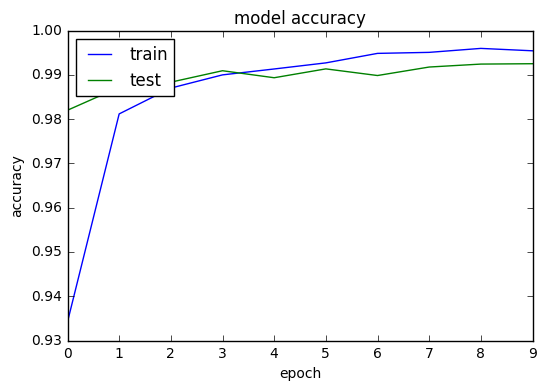

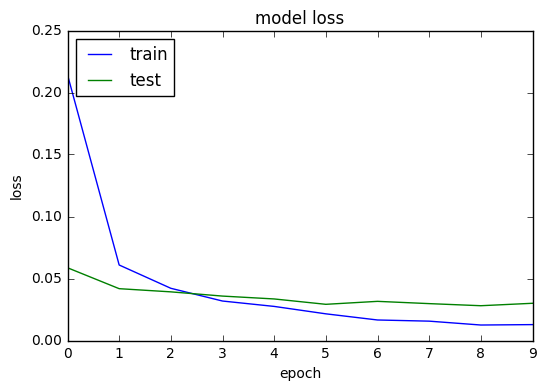

In [12]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

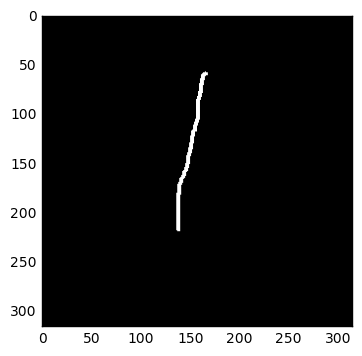

(1, 28, 28, 1)
1/1 [==============================] - 0s 4ms/step
[1]


In [72]:
import numpy as np
from skimage.transform import resize
#预测自定义图片
my_img = np.array(plt.imread('input_imgs/1.png'))
plt.imshow(my_img)
plt.show()
my_img = resize(my_img,(28,28,1)) #图片缩放到指定大小28*28
my_img = my_img.reshape(1,28,28,1) #1张28*28*1的图片
print(my_img.shape)
# res = model.predict(my_img)  print(np.argmax(res))
res = model.predict_classes(my_img)
print(res)